In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import random
import seaborn as sns
from pylab import rcParams

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

%matplotlib inline
rcParams['figure.figsize'] = 20, 10
rcParams['font.size'] = 20

rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

import warnings
warnings.filterwarnings("ignore")

## Train and Test developed algorithm versus scikit algorithm

We are comparing 4 data sets (displayed below), sourced from the UCI archive

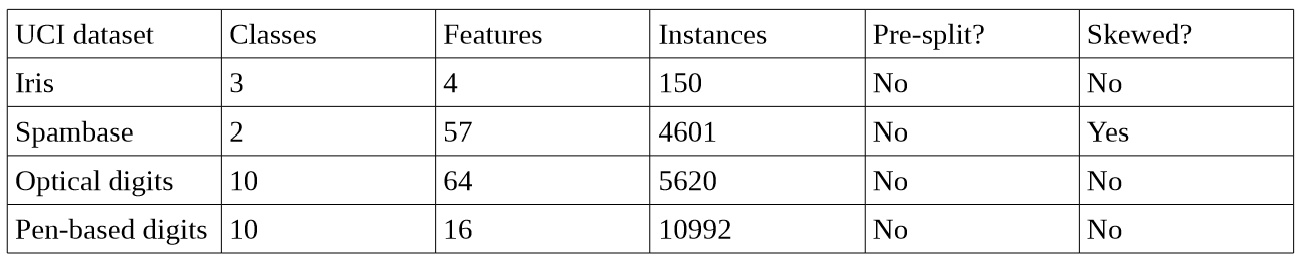

This assignment implements and tests a developed version of a Decision Forest algorithim and compares it to the
version implemented in scikit-learn

## Functions needed

In [3]:
def read_data(filename):
        fid = open(filename,"r")
        data = []
        d = []
        for line in fid.readlines():
            d.append(line.strip())
        for d1 in d:
            data.append(d1.split(","))
        fid.close()

        featureNames = data[0]
        featureNames = featureNames[:-1]
        data = data[1:]
        classes = []
        for d in range(len(data)):
            classes.append(data[d][-1])
            data[d] = data[d][:-1]

        return data,classes,featureNames

def bagging(data,targets,features,nSamples,depth):
    nPoints = np.shape(data)[0]
    nDim = np.shape(data)[1]
    nSamples = nSamples
    # Compute bootstrap samples
    samplePoints = np.random.randint(0,nPoints,(nPoints,nSamples))
    classifier = []
    for i in range(nSamples):
        print('rotation: ', i)
        sample = []
        sampleTarget = []
        for j in range(nPoints):
          sample.append(data[samplePoints[j,i]])
          sampleTarget.append(targets[samplePoints[j,i]])
        # Train classifiers
        #classifier.append(tree.make_tree(sample,sampleTarget,features,-1))# unlimited height for the decision trees
        classifier.append(tree.make_tree(sample,sampleTarget,features,depth))# limit to stumps
        #classifier.append(tree.make_tree(sample,sampleTarget,features,5))
        #classifier.append(tree.make_tree(sample,sampleTarget,features,7))
        #classifier.append(tree.make_tree(sample,sampleTarget,features,11))
        #classifier.append(tree.make_tree(sample,sampleTarget,features,13))
    return classifier

def classifyOG(classifiers,data):
    classified = []
    for j in range(len(data)):
        outputs = []
        for i in range(len(classifiers)):
            out = tree.classify(classifiers[i],data[j])
            if out is not None:
                outputs.append(out)
        
        zero = outputs.count('0')
        one = outputs.count('1')
        two = outputs.count('2')
        if (zero == one) and (zero == two):
            classified.append('?')
        elif zero > one and zero > two:
            classified.append('0')
        elif one > two:
            classified.append('1')
        else:
            classified.append('2')

    return classified

def classify(classifiers,data):
    classDict = {'0':0, '1':0, '2':0, '3':0, '4':0,'5':0,'6':0,'7':0,'8':0,'9':0,'10':0}
    classified = []
    for j in range(len(data)):
        outputs = []
        for i in range(len(classifiers)):
            out = tree.classify(classifiers[i],data[j])
            if out is not None:
                outputs.append(out)
        
        classDict['0'] = outputs.count('0')
        classDict['1'] = outputs.count('1')
        classDict['2'] = outputs.count('2')
        classDict['3'] = outputs.count('3')
        classDict['4'] = outputs.count('4')
        classDict['5'] = outputs.count('5')
        classDict['6'] = outputs.count('6')
        classDict['7'] = outputs.count('7')
        classDict['8'] = outputs.count('8')
        classDict['9'] = outputs.count('9')
        classDict['10'] = outputs.count('10')
        
        max_key = max(classDict, key=classDict.get)
        classified.append(max_key)
        #retClass = max(temp, key=len)
        #classified.append(retClass[0])
        #if (zero == one) and (zero == two):
        #    classified.append('?')
        #elif zero > one and zero > two:
        #    classified.append('0')
        #elif one > two:
        #    classified.append('1')
        #else:
        #    classified.append('2')

    return classified

def classify_weighted(classifiers,data,weights):
    classified = []
    #classDict = {'0':0, '1':0, '2':0, '3':0, '4':0,'5':0,'6':0,'7':0,'8':0,'9':0,'10':0}
    for j in range(len(data)):
        outputs = []
        countnones=0
        county=0
        countn=0
        classDict = {'0':0, '1':0, '2':0, '3':0, '4':0,'5':0,'6':0,'7':0,'8':0,'9':0,'10':0}
        for i in range(len(classifiers)):
            out = tree.classify(classifiers[i],data[j])
            #print("Out here is type: ", type(out), "and value: ", out)
            if out == None:
                countnones=countnones+1
                #print("HERE!")
            else:
                #print(out)
                classDict[out] = classDict[out] + weights[i]
                #print(classDict[out])
        

        max_key = max(classDict, key=classDict.get)
        classified.append(max_key)
    return classified

def compute_accuracy(classifiers,targets,data):
    weights = []
    for i in range(len(classifiers)):
        outputs = []
        for j in range(len(data)):
            out = tree.classify(classifiers[i],data[j])
            outputs.append(out)
        indweight=0.0
        for k in range(len(data)):
            if outputs[k]==targets[k]:
                indweight=indweight+1
        indweight=indweight/len(data)
        weights.append(indweight)
    return weights

#Converts the type into a value for the labels (returns actual value if not a class type)
def conv_textIRSE(x):
    if x == 'Iris-setosa':
        return '0'
    elif x == 'Iris-versicolor':
        return '1'
    elif x == 'Iris-virginica':
        return '2'
    else:
        return x
def conv_textIRVE(x):
    if x == 'Iris-setosa':
        return 'y'
    elif x == 'Iris-versicolor':
        return 'n'
    elif x == 'Iris-virginica':
        return 'n'
    else:
        return x
def conv_textIRVI(x):
    if x == 'Iris-setosa':
        return 'n'
    elif x == 'Iris-versicolor':
        return 'n'
    elif x == 'Iris-virginica':
        return 'y'
    else:
        return x

In [4]:
# Code from Chapter 12 of Machine Learning: An Algorithmic Perspective (2nd Edition)
# by Stephen Marsland (http://stephenmonika.net)

# You are free to use, change, or redistribute the code in any way you wish for
# non-commercial purposes, but please maintain the name of the original author.
# This code comes with no warranty of any kind.

# Stephen Marsland, 2008, 2014

import numpy as np

class dtree:
    """ A basic Decision Tree"""

    def __init__(self):
        """ Constructor """

    def read_data(self,filename):
        fid = open(filename,"r")
        data = []
        d = []
        for line in fid.readlines():
            d.append(line.strip())
        for d1 in d:
            data.append(d1.split(","))
        fid.close()

        self.featureNames = data[0]
        self.featureNames = self.featureNames[:-1]
        data = data[1:]
        self.classes = []
        for d in range(len(data)):
            self.classes.append(data[d][-1])
            data[d] = data[d][:-1]

        return data,self.classes,self.featureNames

    def classify(self,tree,datapoint):

        if type(tree) == type("string"):
            # Have reached a leaf
            #print("Tree here is: ", tree)
            return tree
        else:
            a = list(tree.keys())[0]
            for i in range(len(self.featureNames)):
                if self.featureNames[i]==a:
                    break
            
            try:
                t = tree[a][datapoint[i]]
                return self.classify(t,datapoint)
            except:
                return None

    def classifyAll(self,tree,data):
        results = []
        for i in range(len(data)):
            results.append(self.classify(tree,data[i]))
        return results

    def make_tree(self,data,classes,featureNames,maxlevel=-1,level=0,forest=0):
        """ The main function, which recursively constructs the tree"""

        nData = len(data)
        nFeatures = len(data[0])
        
        try: 
            self.featureNames
        except:
            self.featureNames = featureNames
            
        # List the possible classes
        newClasses = []
        for aclass in classes:
            if newClasses.count(aclass)==0:
                newClasses.append(aclass)

        # Compute the default class (and total entropy)
        frequency = np.zeros(len(newClasses))

        totalEntropy = 0
        totalGini = 0
        index = 0
        for aclass in newClasses:
            frequency[index] = classes.count(aclass)
            totalEntropy += self.calc_entropy(float(frequency[index])/nData)
            totalGini += (float(frequency[index])/nData)**2
            index += 1

        totalGini = 1 - totalGini
        default = classes[np.argmax(frequency)]

        if nData==0 or nFeatures == 0 or (maxlevel>=0 and level>maxlevel):
            # Have reached an empty branch
            return default
        elif classes.count(classes[0]) == nData:
            # Only 1 class remains
            return classes[0]
        else:

            # Choose which feature is best	
            gain = np.zeros(nFeatures)
            ggain = np.zeros(nFeatures)
            featureSet = range(nFeatures)
            if forest != 0:
                np.random.shuffle(featureSet)
                featureSet = featureSet[0:forest]
            for feature in featureSet:
                #print(" " )
                #print("feature gain and gini")
                g,gg = self.calc_info_gain(data,classes,feature)
                #print(feature)
                gain[feature] = totalEntropy - g
                #print(gain[feature])
                ggain[feature] = totalGini - gg
                #print(ggain[feature])
            bestFeature = np.argmax(gain)
            tree = {featureNames[bestFeature]:{}}

            # List the values that bestFeature can take
            values = []
            for datapoint in data:
                if datapoint[feature] not in values:
                    values.append(datapoint[bestFeature])

            for value in values:
                # Find the datapoints with each feature value
                newData = []
                newClasses = []
                index = 0
                for datapoint in data:
                    if datapoint[bestFeature]==value:
                        if bestFeature==0:
                            newdatapoint = datapoint[1:]
                            newNames = featureNames[1:]
                        elif bestFeature==nFeatures:
                            newdatapoint = datapoint[:-1]
                            newNames = featureNames[:-1]
                        else:
                            newdatapoint = datapoint[:bestFeature]
                            newdatapoint.extend(datapoint[bestFeature+1:])
                            newNames = featureNames[:bestFeature]
                            newNames.extend(featureNames[bestFeature+1:])
                        newData.append(newdatapoint)
                        newClasses.append(classes[index])
                    index += 1

                # Now recurse to the next level	
                subtree = self.make_tree(newData,newClasses,newNames,maxlevel,level+1,forest)

                # And on returning, add the subtree on to the tree
                tree[featureNames[bestFeature]][value] = subtree

            return tree

    def printTree(self,tree,name):
        if type(tree) == dict:
            #print(name, list(tree.keys())[0])
            for item in list(tree.values())[0].keys():
                print(name, item)
                self.printTree(list(tree.values())[0][item], name + "\t")
        else:
            print(name, "\t->\t", tree)

    def calc_entropy(self,p):
        if p!=0:
            return -p * np.log2(p)
        else:
            return 0

    def calc_info_gain(self,data,classes,feature):

        # Calculates the information gain based on both entropy and the Gini impurity
        gain = 0
        ggain = 0
        nData = len(data)

        # List the values that feature can take

        values = []
        for datapoint in data:
            if datapoint[feature] not in values:
                values.append(datapoint[feature])

        featureCounts = np.zeros(len(values))
        entropy = np.zeros(len(values))
        gini = np.zeros(len(values))
        valueIndex = 0
        # Find where those values appear in data[feature] and the corresponding class
        for value in values:
            dataIndex = 0
            newClasses = []
            for datapoint in data:
                if datapoint[feature]==value:
                    featureCounts[valueIndex]+=1
                    newClasses.append(classes[dataIndex])
                dataIndex += 1

            # Get the values in newClasses
            classValues = []
            for aclass in newClasses:
                if classValues.count(aclass)==0:
                    classValues.append(aclass)

            classCounts = np.zeros(len(classValues))
            classIndex = 0
            for classValue in classValues:
                for aclass in newClasses:
                    if aclass == classValue:
                        classCounts[classIndex]+=1 
                classIndex += 1
            #print(" ") 
            #print("DEBUG ")
            for classIndex in range(len(classValues)):
                entropy[valueIndex] += self.calc_entropy(float(classCounts[classIndex])/np.sum(classCounts))
                gini[valueIndex] += (float(classCounts[classIndex])/np.sum(classCounts))**2
                #print(gini)

            # Computes both the Gini gain and the entropy
            #print("ggain")
            gain = gain + float(featureCounts[valueIndex])/nData * entropy[valueIndex]
            ggain = ggain + float(featureCounts[valueIndex])/nData * gini[valueIndex]
            #print(ggain)
            valueIndex += 1
        return gain, 1-ggain

In [5]:
def df_produce(dict_2,name):
    df = pd.DataFrame.from_dict({(i,j): dict_2[i][j] 
                           for i in dict_2.keys() 
                           for j in dict_2[i].keys()}
                       #orient='index'
                      )
    df_us = df.unstack()
    df_us = df_us.rename("accuracy")
    df_us = df_us.to_frame()
    df_us.reset_index(inplace=True)
    df_us.rename(columns={'level_0': name,'level_1':'type','level_2':'split'},inplace=True)
    return df_us

## Iris Dataset


- 3 Classes
- 4 Features
- 150 Instances
- __Not__ Pre split
- __Not__ Skewed

Reading in input, splitting into 3 groupings, ready for trifold splitting

In [72]:
iris_DF = pd.read_csv("iris.data", names=['Sepal length','Sepal width','Petal length','Petal width','Class'])
iris_DF = iris_DF.applymap(conv_textIRSE)

#iris_DF = iris_DF.round()
iris_DF.to_csv('new_iris.csv', index = False)
irisTemp = iris_DF.sample(frac = 0.667, random_state = 66)
iris1 = iris_DF.drop(irisTemp.index)
iris2 = irisTemp.sample(frac = 0.5, random_state = 66)
iris3 = irisTemp.drop(iris2.index)
iris1.reset_index(drop=True, inplace = True)
iris2.reset_index(drop=True, inplace = True)
iris3.reset_index(drop=True, inplace = True)
iris1.to_csv('irisSet1.csv', index=False)
iris2.to_csv('irisSet2.csv', index=False)
iris3.to_csv('irisSet3.csv', index=False)



In [73]:
combSet = [iris1, iris2]
train1 = pd.concat(combSet, ignore_index = True)
train1.to_csv("irisTrain1.csv", index = False)
iris3.to_csv("irisTest1.csv", index = False)

combSet = [iris1, iris3]
train2 = pd.concat(combSet, ignore_index = True)
train2.to_csv("irisTrain2.csv", index = False)
iris2.to_csv("irisTest2.csv", index = False)

combSet = [iris2, iris3]
train3 = pd.concat(combSet, ignore_index = True)
train3.to_csv("irisTrain3.csv", index = False)
iris1.to_csv("irisTest3.csv", index = False)

## Readin for Iris Scikit

In [75]:
irisArray = iris_DF.values
dataSet = irisArray[0:, 0:4]
label = irisArray[0:,4]


## Iris Scikit Decision Tree (at depth 2 and 4)

{2: {'test': [90.19607843137256, 94.11764705882352, 95.83333333333334], 'train': [98.98989898989899, 95.95959595959596, 95.09803921568627]}, 4: {'test': [92.15686274509804, 94.11764705882352, 97.91666666666666], 'train': [100.0, 97.97979797979798, 97.05882352941177]}}


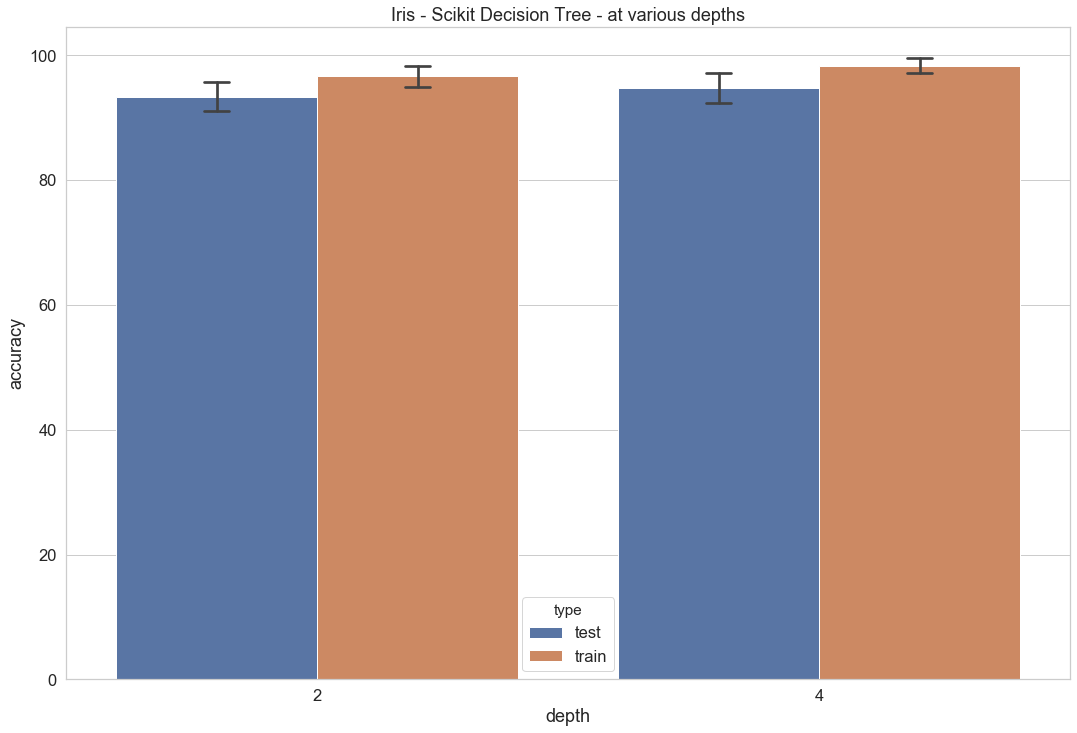

In [77]:
accuracyDTSciIris = []
accuracyDTSciIrisTrain = []


depth_features = [2,4]
iris_scikit_decision_tree_dict = {}

for i in depth_features:
    accuracyDTSciIris = []
    accuracyDTSciIrisTrain = []
    k_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
    model=DecisionTreeClassifier(max_depth=i)

    for train, test in k_fold.split(dataSet, label):
        model.fit(dataSet[train],label[train])
        y_pred=model.predict(dataSet[test])
        y_pred_train = model.predict(dataSet[train])
        accuracyDTSciIris.append(metrics.accuracy_score(label[test], y_pred)*100)
        accuracyDTSciIrisTrain.append(metrics.accuracy_score(label[train], y_pred_train)*100)
    iris_scikit_decision_tree_dict[i] = {'test':accuracyDTSciIris, 'train':accuracyDTSciIrisTrain}

# print(accuracyDTSciIris)
# print(accuracyDTSciIrisTrain)

print(iris_scikit_decision_tree_dict)

df_iris_sk_dt = df_produce(iris_scikit_decision_tree_dict,'depth')
plt.figure(figsize=(18,12))
ax = sns.barplot(x="depth", y="accuracy", hue="type", data=df_iris_sk_dt, ci="sd",capsize=.05).set_title("Iris - Scikit Decision Tree - at various depths")
ax = sns.set(style="whitegrid", font_scale=1.5)

## Iris Scikit Random Forest (5, 23, 59, 101)

In [68]:
# accuracyRFSciIris = []
# accuracyRFSciIrisTrain = []

# for y in [5,23,59,101]:
#     model=RandomForestClassifier(n_estimators=y)
#     k_fold = StratifiedKFold(n_splits=3, shuffle = True, random_state=1)
#     for train, test in k_fold.split(dataSet, label):
#         model.fit(dataSet[train],label[train])
#         y_pred=clf.predict(dataSet[test])
#         y_pred_train = model.predict(dataSet[train])
#         accuracyRFSciIris.append(metrics.accuracy_score(label[test], y_pred)*100)
#         accuracyRFSciIrisTrain.append(metrics.accuracy_score(label[train], y_pred_train)*100)

# print(accuracyRFSciIris)
# print(accuracyRFSciIrisTrain)

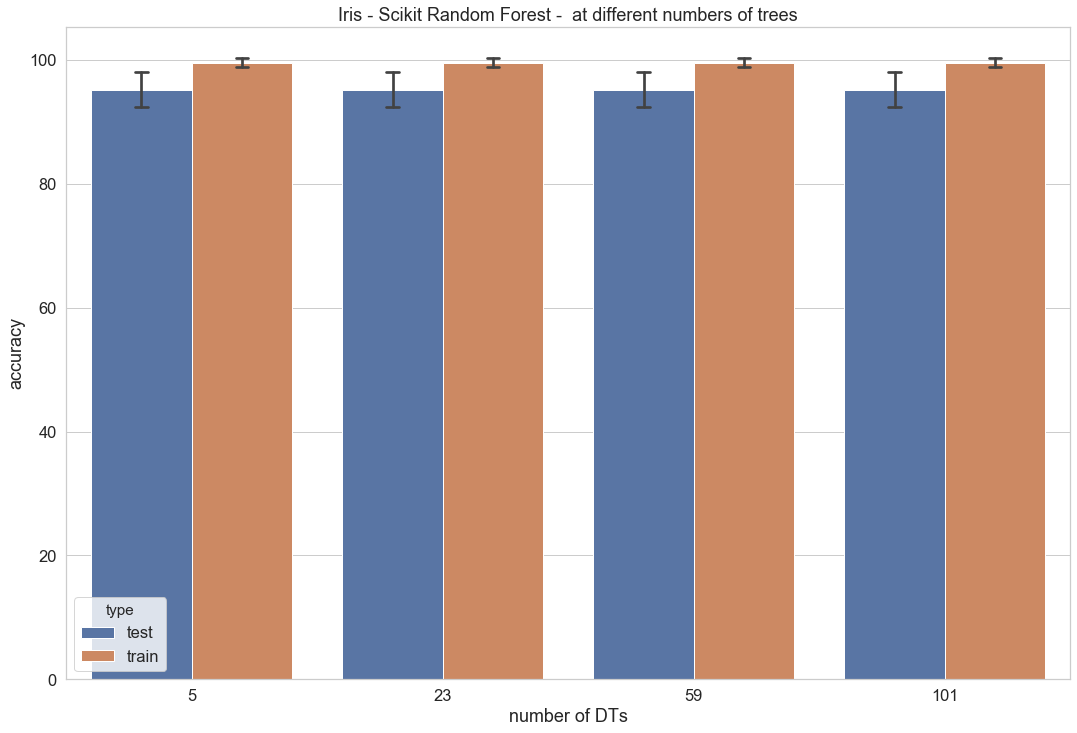

In [78]:
accuracyRFSciIris = []
accuracyRFSciIrisTrain = []
iris_scikit_random_forest_dict = {}

depth_features = [5,23,59,101]


for i in depth_features:
    accuracyDTSciIris = []
    accuracyDTSciIrisTrain = []
    k_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
    model=RandomForestClassifier(max_depth=i)

    for train, test in k_fold.split(dataSet, label):
        model.fit(dataSet[train],label[train])
        y_pred=model.predict(dataSet[test])
        y_pred_train = model.predict(dataSet[train])
        accuracyRFSciIris.append(metrics.accuracy_score(label[test], y_pred)*100)
        accuracyRFSciIrisTrain.append(metrics.accuracy_score(label[train], y_pred_train)*100)
    iris_scikit_random_forest_dict[i] = {'test':accuracyRFSciIris, 'train':accuracyRFSciIrisTrain}

# print(accuracyDTSciIris)
# print(accuracyDTSciIrisTrain)

# print(iris_scikit_random_forest_dict)

df_iris_sk_rf = df_produce(iris_scikit_random_forest_dict,'number of DTs')
plt.figure(figsize=(18,12))
ax = sns.barplot(x="number of DTs", y="accuracy", hue="type", data=df_iris_sk_rf, ci="sd",capsize=.05).set_title("Iris - Scikit Random Forest -  at different numbers of trees")
ax = sns.set(style="whitegrid", font_scale=1.5)

## Spambase Dataset


- 2 Classes
- 57 Features
- 4601 Instances
- __Not__ Pre split
- Skewed

In [6]:
spam_DF = pd.read_csv("spambase.data", names=range(1,59))

spam_DF = spam_DF.round(decimals=1)
spam_DF[58] = spam_DF[58].astype(str)

#train = spam_DF.sample(frac = 0.66, random_state = 1)
#test = spam_DF.drop(train.index)
#train.reset_index(drop=True, inplace = True)
#test.reset_index(drop=True, inplace = True)
#train.to_csv('spam_Train.csv', index=False)
#test.to_csv('spam_Test.csv', index=False)


In [7]:
spam_DF.to_csv('new_spam.csv', index = False)
spamTemp = spam_DF.sample(frac = 0.667, random_state = 42)
spam1 = spam_DF.drop(spamTemp.index)
spam2 = spamTemp.sample(frac = 0.5, random_state = 42)
spam3 = spamTemp.drop(spam2.index)
spam1.reset_index(drop=True, inplace = True)
spam2.reset_index(drop=True, inplace = True)
spam3.reset_index(drop=True, inplace = True)
spam1.to_csv('spamSet1.csv', index=False)
spam2.to_csv('spamSet2.csv', index=False)
spam3.to_csv('spamSet3.csv', index=False)


In [8]:
train = spam_DF.sample(frac = 0.66, random_state = 1)
test = spam_DF.drop(train.index)
train.reset_index(drop=True, inplace = True)
test.reset_index(drop=True, inplace = True)
train.to_csv('spam_Train.csv', index=False)
test.to_csv('spam_Test.csv', index=False)


## Read in For scikit processing

In [56]:
spamArray = spam_DF.values
dataSet = spamArray[0:, 0:57]
label = spamArray[0:,57]

## Spam Scikit Decision Tree 

{5: {'test': [90.1628664495114, 90.47619047619048, 91.51989562948467], 'train': [91.35681669928245, 92.3076923076923, 92.76401564537157]}, 7: {'test': [91.7915309446254, 91.65035877364645, 92.23744292237443], 'train': [94.25962165688193, 94.19817470664928, 94.85006518904824]}, 11: {'test': [92.63843648208469, 91.8460534898891, 92.4331376386171], 'train': [97.19504240052184, 96.77314211212517, 96.90352020860496]}, 13: {'test': [91.85667752442997, 92.10697977821265, 92.82452707110241], 'train': [97.94520547945206, 97.55541069100391, 97.45762711864407]}}


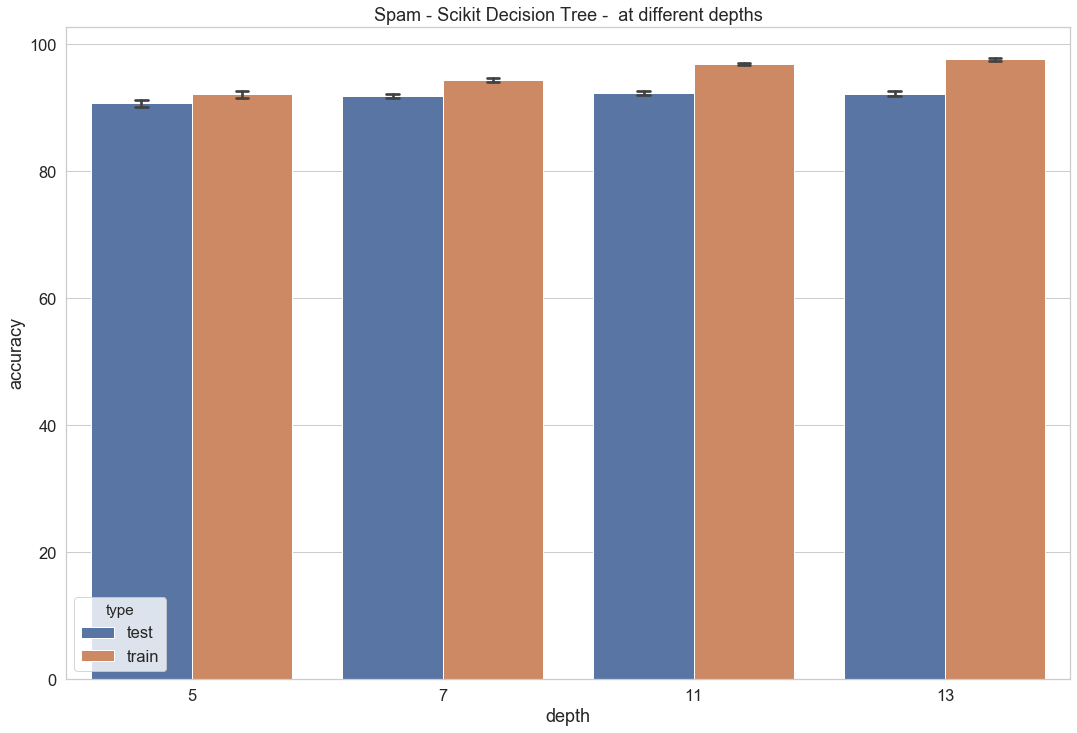

In [57]:
accuracyDTSciSpam = []
accuracyDTSciSpamTrain = []


depth_features = [5,7,11,13]
spam_scikit_decision_tree_dict = {}

for i in depth_features:
    accuracyDTSciSpam = []
    accuracyDTSciSpamTrain = []
    k_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
    model=DecisionTreeClassifier(max_depth=i)

    for train, test in k_fold.split(dataSet, label):
        model.fit(dataSet[train],label[train])
        y_pred=model.predict(dataSet[test])
        y_pred_train = model.predict(dataSet[train])
        accuracyDTSciSpam.append(metrics.accuracy_score(label[test], y_pred)*100)
        accuracyDTSciSpamTrain.append(metrics.accuracy_score(label[train], y_pred_train)*100)
    spam_scikit_decision_tree_dict[i] = {'test':accuracyDTSciSpam, 'train':accuracyDTSciSpamTrain}

# print(accuracyDTSciIris)
# print(accuracyDTSciIrisTrain)

print(spam_scikit_decision_tree_dict)

df_spam_sk_dt = df_produce(spam_scikit_decision_tree_dict,'depth')
plt.figure(figsize=(18,12))
ax = sns.barplot(x="depth", y="accuracy", hue="type", data=df_spam_sk_dt, ci="sd",capsize=.05).set_title("Spam - Scikit Decision Tree -  at different depths")
ax = sns.set(style="whitegrid", font_scale=1.5)

### Spam Scikit Random Forest

{5: {'test': [91.72638436482085, 91.8460534898891, 91.78082191780823], 'train': [92.3679060665362, 93.15514993481095, 92.92698826597132]}, 23: {'test': [92.70358306188925, 91.32420091324201, 91.91128506196999], 'train': [91.91128506196999, 92.73142112125163, 92.40547588005215]}, 59: {'test': [91.1400651465798, 91.58512720156556, 91.91128506196999], 'train': [91.87866927592955, 93.35071707953064, 92.82920469361147]}, 101: {'test': [93.48534201954396, 90.8675799086758, 90.8675799086758], 'train': [92.95499021526419, 92.503259452412, 92.14471968709258]}}


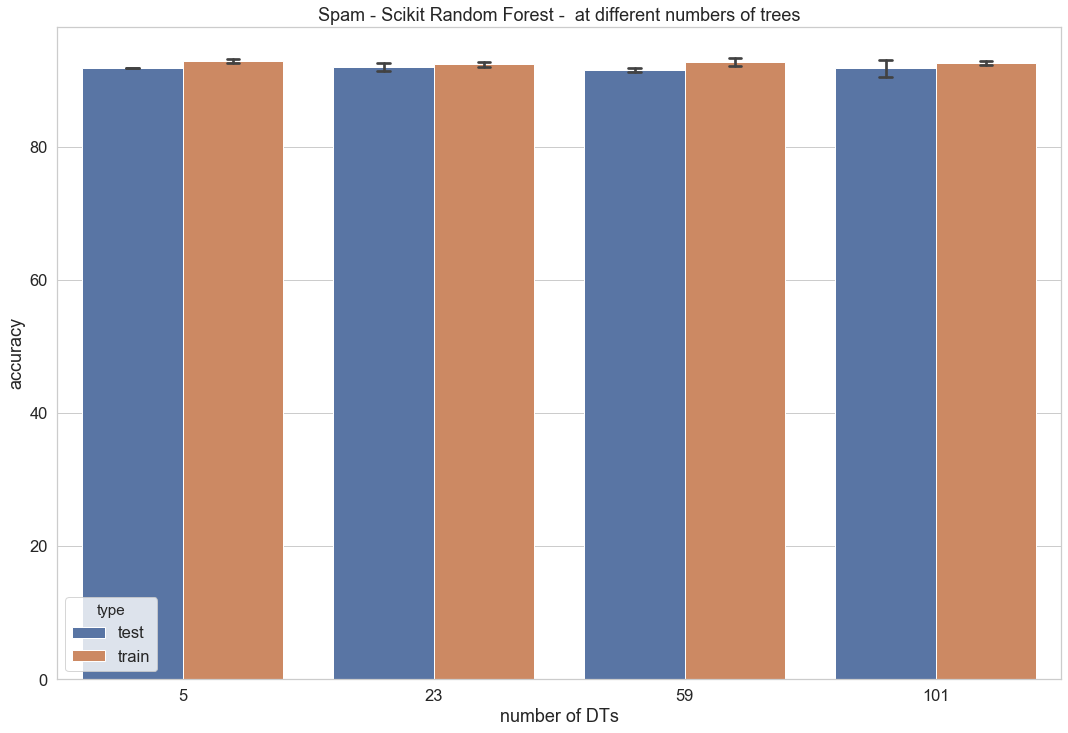

In [59]:
# accuracyRFSciSpam = []
# accuracyRFSciSpamTrain = []
# clf=RandomForestClassifier(n_estimators=150)
# k_fold = StratifiedKFold(n_splits=3, shuffle = True, random_state=1)
# for train, test in k_fold.split(dataSet, label):
#     clf.fit(dataSet[train],label[train])
#     y_pred=clf.predict(dataSet[test])
#     y_pred_train = clf.predict(dataSet[train])
#     accuracySciSpam.append(metrics.accuracy_score(label[test], y_pred)*100)
#     accuracySciSpamTrain.append(metrics.accuracy_score(label[train], y_pred_train)*100)
    
    
# accuracyRFSciSpam = []
# accuracyRFSciSpamTrain = []
spam_scikit_random_forest_dict = {}
depth_features = [5,23,59,101]


for i in depth_features:
    accuracyRFSciSpam = []
    accuracyRFSciSpamTrain = []
    k_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
    model=RandomForestClassifier(max_depth=5)

    for train, test in k_fold.split(dataSet, label):
        model.fit(dataSet[train],label[train])
        y_pred=model.predict(dataSet[test])
        y_pred_train = model.predict(dataSet[train])
        accuracyRFSciSpam.append(metrics.accuracy_score(label[test], y_pred)*100)
        accuracyRFSciSpamTrain.append(metrics.accuracy_score(label[train], y_pred_train)*100)
    spam_scikit_random_forest_dict[i] = {'test':accuracyRFSciSpam, 'train':accuracyRFSciSpamTrain}

# print(accuracyDRFSciSpam)
# print(accuracyRFSciSpamTrain)

print(spam_scikit_random_forest_dict)

df_spam_sk_rf = df_produce(spam_scikit_random_forest_dict,'number of DTs')
plt.figure(figsize=(18,12))
ax = sns.barplot(x="number of DTs", y="accuracy", hue="type", data=df_spam_sk_rf, ci="sd",capsize=.05).set_title("Spam - Scikit Random Forest -  at different numbers of trees")
ax = sns.set(style="whitegrid", font_scale=1.5)

## Optic Digits Dataset

- 10 Classes
- 64 Features
- 5620 Instances
- __Not__ Pre split
- __Not__ Skewed

In [41]:
opticTra_DFOG = pd.read_csv("optdigits.tra", header=None)
opticTes_DFOG = pd.read_csv("optdigits.tes", header=None)
combSet = [opticTes_DFOG, opticTra_DFOG]
optic_DFOG = pd.concat(combSet, ignore_index = True)
optic_DFOG.to_csv("OpticSet.csv", index = False)

In [42]:
optic_DFOG.to_csv('new_optic.csv', index = False)
opticTemp = optic_DFOG.sample(frac = 0.667, random_state = 42)
optic1 = optic_DFOG.drop(opticTemp.index)
optic2 = opticTemp.sample(frac = 0.5, random_state = 42)
optic3 = opticTemp.drop(optic2.index)
optic1.reset_index(drop=True, inplace = True)
optic2.reset_index(drop=True, inplace = True)
optic3.reset_index(drop=True, inplace = True)
optic1.to_csv('opticSet1.csv', index=False)
optic2.to_csv('opticSet2.csv', index=False)
optic3.to_csv('opticSet3.csv', index=False)

In [43]:
train = optic_DFOG.sample(frac = 0.66, random_state = 1)
test = optic_DFOG.drop(train.index)
train.reset_index(drop=True, inplace = True)
test.reset_index(drop=True, inplace = True)
train.to_csv('optic_Train.csv', index=False)
test.to_csv('optic_Test.csv', index=False)


In [43]:
tree = dtree()
data,targets,features = read_data("optic_Train.csv")
testdata,testtargets,testfeatures = read_data('optic_Test.csv')
#N=3037
N = 20
classifiers1 = bagging(data,targets,features,N)
#classifying training samples with multiple decision trees
trainingclassifications = classify(classifiers1,data)
print( " " )
print( "training targets          ",targets)
print( "training classifications: ",trainingclassifications)
a = np.zeros(len(trainingclassifications))
for i in range(len(trainingclassifications)):
    if targets[i] == trainingclassifications[i]:
        a[i]=1
print( "Training accuracy:", (np.sum(a)/len(a)*100.0))

#classifying test samples with multiple decision trees
testclassifications = classify(classifiers1,testdata)
print( " " )
print( "test targets          ",testtargets)
print( "test classifications: ",testclassifications)
a = np.zeros(len(testclassifications))
for i in range(len(testclassifications)):
    if testtargets[i] == testclassifications[i]:
        a[i]=1
print( "Test accuracy:", (np.sum(a)/len(a)*100.0))

rotation:  0
rotation:  1
rotation:  2
rotation:  3
rotation:  4
rotation:  5
rotation:  6
rotation:  7
rotation:  8
rotation:  9
rotation:  10
rotation:  11
rotation:  12
rotation:  13
rotation:  14
rotation:  15
rotation:  16
rotation:  17
rotation:  18
rotation:  19
 
training targets           ['0', '6', '8', '5', '2', '0', '2', '6', '7', '4', '2', '7', '4', '5', '6', '4', '8', '2', '1', '8', '7', '7', '3', '0', '6', '0', '2', '8', '9', '3', '6', '0', '3', '7', '8', '1', '7', '0', '3', '3', '7', '3', '8', '5', '4', '3', '8', '8', '7', '0', '8', '6', '1', '5', '7', '2', '9', '7', '4', '3', '8', '8', '4', '8', '9', '2', '2', '6', '3', '5', '6', '6', '6', '4', '7', '1', '4', '3', '0', '4', '8', '9', '1', '0', '1', '2', '0', '8', '3', '7', '1', '9', '2', '5', '5', '8', '1', '4', '7', '5', '2', '2', '5', '6', '7', '6', '1', '1', '1', '5', '1', '3', '1', '1', '0', '9', '7', '6', '3', '6', '3', '1', '5', '8', '0', '2', '6', '7', '9', '5', '8', '8', '3', '2', '7', '4', '2', '3', '9', '3', 

 
test targets           ['0', '2', '8', '4', '5', '6', '8', '0', '4', '5', '9', '0', '9', '0', '8', '1', '7', '5', '0', '0', '2', '7', '8', '3', '7', '3', '9', '1', '5', '9', '8', '2', '1', '2', '1', '6', '6', '8', '4', '9', '5', '7', '8', '5', '7', '4', '8', '1', '5', '0', '3', '4', '5', '9', '0', '2', '3', '5', '6', '5', '5', '6', '8', '7', '7', '5', '0', '8', '2', '0', '3', '4', '2', '0', '7', '6', '3', '1', '0', '1', '4', '7', '2', '5', '4', '8', '0', '8', '5', '7', '8', '9', '0', '3', '5', '8', '1', '5', '8', '0', '9', '8', '9', '8', '1', '7', '2', '1', '3', '7', '3', '1', '5', '0', '2', '0', '3', '7', '8', '4', '1', '4', '6', '2', '5', '9', '4', '8', '8', '4', '9', '9', '2', '5', '4', '6', '8', '9', '2', '4', '5', '6', '9', '5', '9', '8', '8', '3', '3', '4', '6', '4', '9', '0', '2', '1', '7', '7', '6', '3', '1', '4', '5', '3', '9', '1', '4', '2', '7', '9', '9', '0', '8', '3', '7', '2', '3', '5', '6', '6', '6', '5', '0', '2', '2', '9', '2', '0', '1', '4', '1', '1', '6', '0', '5',

In [48]:
OpticTrain = []
OpticTest = []
for x in range(0,3):
    train = optic_DFOG.sample(frac = 0.66, random_state = random.randint(0,200))
    test = optic_DFOG.drop(train.index)
    train.reset_index(drop=True, inplace = True)
    test.reset_index(drop=True, inplace = True)
    train.to_csv('optic_Train.csv', index=False)
    test.to_csv('optic_Test.csv', index=False)
    tree = dtree()
    data,targets,features = read_data("optic_Train.csv")
    testdata,testtargets,testfeatures = read_data('optic_Test.csv')
    N=10
    classifiers1 = bagging(data,targets,features,N)
    #classifying training samples with multiple decision trees
    trainingclassifications = classify(classifiers1,data)
    print( " " )
    print( "training targets          ",targets)
    print( "training classifications: ",trainingclassifications)
    a = np.zeros(len(trainingclassifications))
    for i in range(len(trainingclassifications)):
        if targets[i] == trainingclassifications[i]:
            a[i]=1
    print( "Training accuracy:", (np.sum(a)/len(a)*100.0))
    OpticTrain.append((np.sum(a)/len(a)*100.0))

    #classifying test samples with multiple decision trees
    testclassifications = classify(classifiers1,testdata)
    print( " " )
    print( "test targets          ",testtargets)
    print( "test classifications: ",testclassifications)
    a = np.zeros(len(testclassifications))
    for i in range(len(testclassifications)):
        if testtargets[i] == testclassifications[i]:
            a[i]=1
    print( "Test accuracy:", (np.sum(a)/len(a)*100.0))
    OpticTest.append((np.sum(a)/len(a)*100.0))

rotation:  0
rotation:  1
rotation:  2
rotation:  3
rotation:  4
rotation:  5
rotation:  6
rotation:  7
rotation:  8
rotation:  9
 
training targets           ['9', '2', '3', '1', '6', '1', '7', '0', '3', '5', '4', '6', '0', '4', '8', '5', '2', '0', '9', '0', '5', '2', '5', '3', '1', '7', '9', '6', '8', '9', '9', '3', '7', '2', '2', '3', '4', '4', '1', '1', '6', '8', '4', '0', '2', '7', '6', '7', '7', '4', '3', '3', '3', '7', '4', '5', '8', '4', '9', '8', '1', '1', '1', '6', '9', '2', '7', '4', '9', '3', '1', '3', '0', '3', '1', '9', '9', '6', '8', '9', '9', '0', '0', '8', '8', '8', '2', '4', '6', '3', '5', '9', '6', '9', '4', '1', '2', '9', '3', '5', '8', '7', '1', '7', '3', '3', '7', '4', '9', '4', '9', '6', '0', '2', '9', '2', '5', '2', '4', '7', '7', '0', '8', '9', '8', '4', '5', '5', '8', '9', '6', '8', '3', '6', '0', '8', '4', '0', '8', '3', '1', '1', '2', '3', '9', '9', '7', '9', '1', '1', '4', '6', '1', '0', '7', '7', '2', '1', '2', '7', '1', '9', '2', '8', '6', '0', '8', '8', 

Test accuracy: 24.75143903715332
rotation:  0
rotation:  1
rotation:  2
rotation:  3
rotation:  4
rotation:  5
rotation:  6
rotation:  7
rotation:  8
rotation:  9
 
training targets           ['2', '9', '0', '7', '1', '7', '4', '1', '7', '8', '3', '6', '9', '8', '1', '9', '5', '8', '7', '3', '7', '6', '4', '6', '9', '6', '2', '7', '5', '1', '0', '7', '9', '3', '2', '2', '2', '9', '4', '7', '1', '9', '6', '4', '5', '4', '3', '3', '0', '5', '8', '5', '1', '2', '2', '3', '6', '3', '7', '5', '3', '1', '3', '6', '5', '6', '1', '4', '1', '9', '7', '7', '7', '8', '6', '5', '3', '3', '9', '6', '7', '6', '5', '8', '8', '9', '8', '1', '4', '5', '7', '4', '8', '4', '0', '9', '4', '1', '9', '9', '9', '9', '9', '6', '1', '4', '5', '7', '7', '1', '6', '7', '4', '4', '3', '0', '1', '2', '5', '6', '1', '4', '3', '6', '4', '4', '5', '7', '5', '9', '1', '0', '5', '8', '8', '1', '7', '8', '3', '1', '7', '9', '8', '7', '4', '4', '6', '6', '3', '2', '2', '7', '2', '3', '8', '7', '1', '4', '4', '0', '8', '0

rotation:  0
rotation:  1
rotation:  2
rotation:  3
rotation:  4
rotation:  5
rotation:  6
rotation:  7
rotation:  8
rotation:  9
 
training targets           ['2', '8', '3', '7', '4', '0', '6', '0', '1', '8', '7', '9', '4', '1', '8', '6', '5', '8', '1', '7', '6', '4', '1', '7', '1', '6', '5', '1', '6', '7', '9', '7', '0', '9', '5', '9', '4', '4', '5', '2', '7', '0', '0', '9', '5', '6', '3', '2', '2', '3', '8', '3', '8', '2', '6', '9', '5', '9', '3', '0', '4', '0', '6', '3', '2', '3', '6', '2', '4', '4', '7', '1', '6', '1', '5', '0', '5', '7', '0', '2', '7', '8', '1', '4', '1', '4', '1', '1', '4', '1', '5', '1', '8', '7', '1', '2', '0', '6', '6', '8', '8', '4', '1', '3', '8', '5', '4', '8', '2', '3', '9', '3', '4', '3', '7', '8', '0', '8', '8', '5', '9', '0', '6', '9', '8', '1', '5', '7', '4', '1', '6', '8', '0', '1', '4', '7', '2', '5', '0', '8', '1', '2', '0', '3', '7', '5', '2', '4', '3', '6', '7', '5', '4', '7', '7', '3', '2', '9', '1', '9', '8', '1', '2', '2', '2', '8', '3', '1', 

## Read in for scikit

In [60]:
opticArray = optic_DFOG.values
dataSet = opticArray[0:, 0:64]
label = opticArray[0:,64]

## Optic Scikit Decision Tree

{5: {'test': [69.79222163026105, 70.97118463180362, 63.50989834135902], 'train': [71.73390328613411, 71.75654030966363, 66.14236203679019]}, 7: {'test': [82.6851358550879, 81.75026680896478, 80.63135366506154], 'train': [87.01576275714667, 86.17191671115857, 83.63103172487337]}, 11: {'test': [89.1848694725626, 88.7940234791889, 87.64044943820225], 'train': [98.66417312316324, 98.79871863320876, 97.0674486803519]}, 13: {'test': [89.1848694725626, 88.95410885805764, 88.60353130016051], 'train': [99.8397007747796, 99.7330485851575, 99.06691548920288]}}


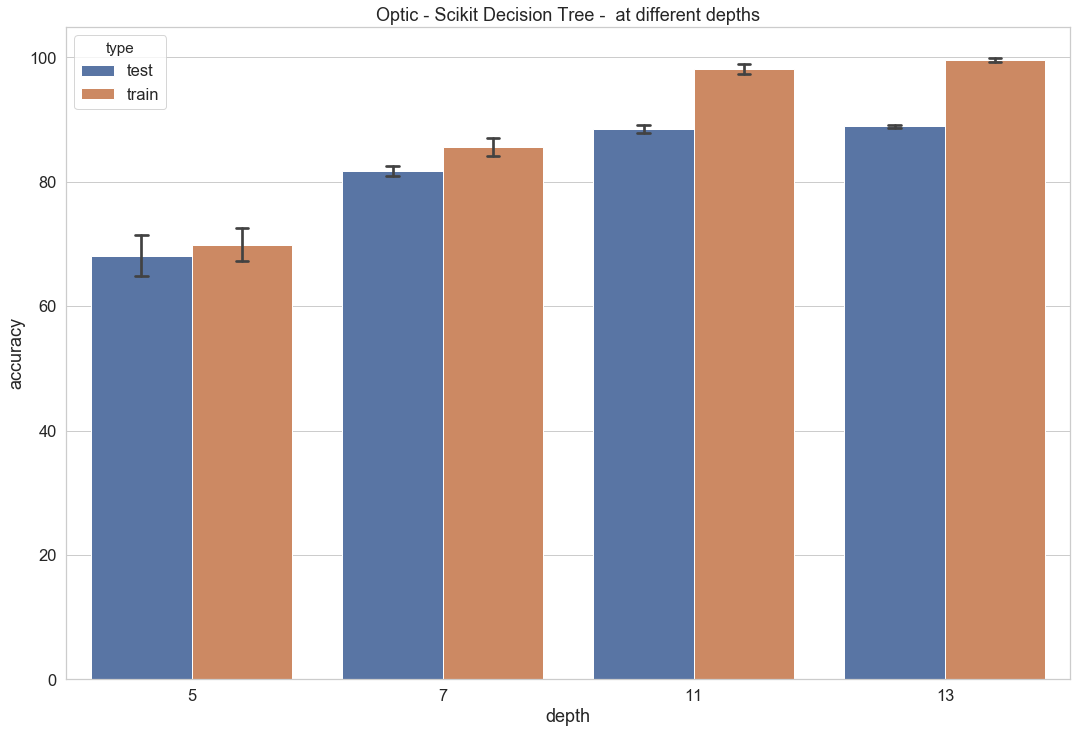

In [61]:
accuracyDTSciOptic = []
accuracyDTSciOpticTrain = []


depth_features = [5,7,11,13]
optic_scikit_decision_tree_dict = {}

for i in depth_features:
    accuracyDTSciOptic = []
    accuracyDTSciOpticTrain = []
    k_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
    model=DecisionTreeClassifier(max_depth=i)

    for train, test in k_fold.split(dataSet, label):
        model.fit(dataSet[train],label[train])
        y_pred=model.predict(dataSet[test])
        y_pred_train = model.predict(dataSet[train])
        accuracyDTSciOptic.append(metrics.accuracy_score(label[test], y_pred)*100)
        accuracyDTSciOpticTrain.append(metrics.accuracy_score(label[train], y_pred_train)*100)
    optic_scikit_decision_tree_dict[i] = {'test':accuracyDTSciOptic, 'train':accuracyDTSciOpticTrain}

# print(accuracyDTSciOptic)
# print(accuracyDTSciOpticTrain)

print(optic_scikit_decision_tree_dict)

df_optic_sk_dt = df_produce(optic_scikit_decision_tree_dict,'depth')
plt.figure(figsize=(18,12))
ax = sns.barplot(x="depth", y="accuracy", hue="type", data=df_optic_sk_dt, ci="sd",capsize=.05).set_title("Optic - Scikit Decision Tree -  at different depths")
ax = sns.set(style="whitegrid", font_scale=1.5)

## Optic Scikit Random Forest

{5: {'test': [89.71763452317528, 89.54108858057631, 89.13857677902621], 'train': [91.18354261287736, 90.81687132941805, 90.74913356438283]}, 23: {'test': [89.39797549280767, 90.07470651013874, 88.92455858747994], 'train': [90.62249532460594, 91.5910304324613, 91.65555851772861]}, 59: {'test': [89.93074054342036, 90.98185699039489, 89.29909042268592], 'train': [92.30563718942025, 92.15162840363054, 91.86883497733938]}, 101: {'test': [89.39797549280767, 89.32764140875133, 90.4226859283039], 'train': [91.04995992519369, 91.56433529097704, 91.81551586243668]}}


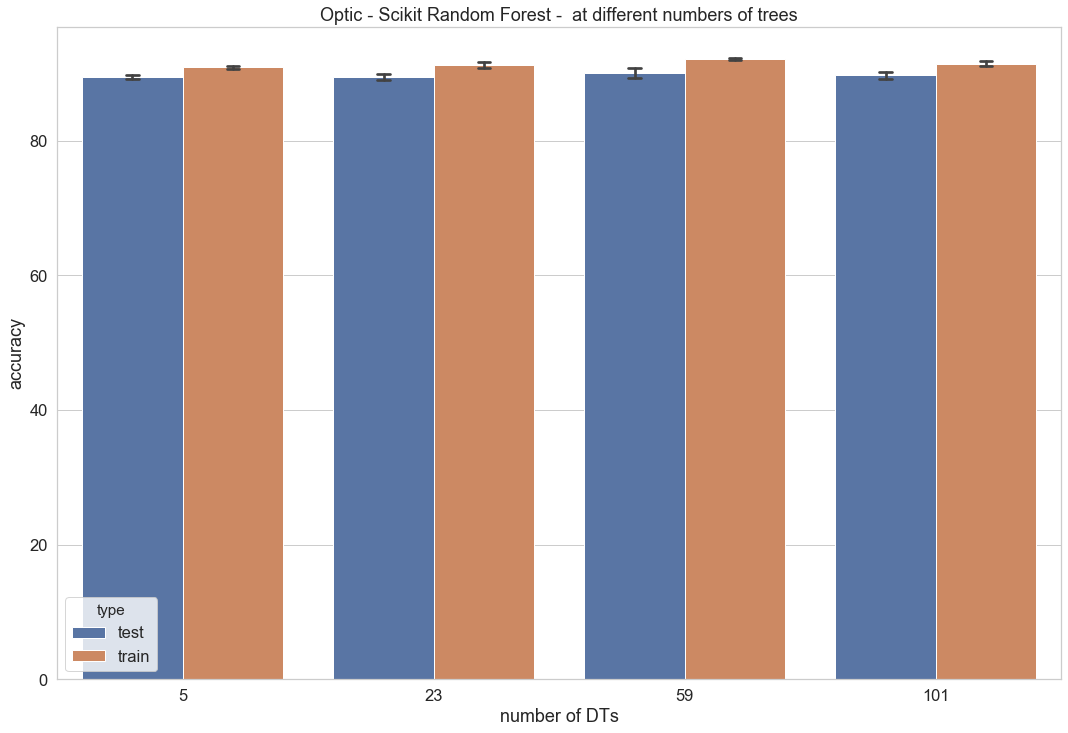

In [62]:
optic_scikit_random_forest_dict = {}
depth_features = [5,23,59,101]


for i in depth_features:
    accuracyRFSciOptic = []
    accuracyRFSciOpticTrain = []
    k_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
    model=RandomForestClassifier(max_depth=5)

    for train, test in k_fold.split(dataSet, label):
        model.fit(dataSet[train],label[train])
        y_pred=model.predict(dataSet[test])
        y_pred_train = model.predict(dataSet[train])
        accuracyRFSciOptic.append(metrics.accuracy_score(label[test], y_pred)*100)
        accuracyRFSciOpticTrain.append(metrics.accuracy_score(label[train], y_pred_train)*100)
    optic_scikit_random_forest_dict[i] = {'test':accuracyRFSciOptic, 'train':accuracyRFSciOpticTrain}

# print(accuracyRFSciOptic)
# print(accuracyRFSciOpticTrain)

print(optic_scikit_random_forest_dict)

df_optic_sk_rf = df_produce(optic_scikit_random_forest_dict,'number of DTs')
plt.figure(figsize=(18,12))
ax = sns.barplot(x="number of DTs", y="accuracy", hue="type", data=df_optic_sk_rf, ci="sd",capsize=.05).set_title("Optic - Scikit Random Forest -  at different numbers of trees")
ax = sns.set(style="whitegrid", font_scale=1.5)

## Pen Digits Dataset

- 10 Classes
- 16 Features
- 10992 Instances
- __Not__ Pre split
- __Not__ Skewed

In [63]:
penTra_DFOG = pd.read_csv("pendigits.tra", header=None)
penTes_DFOG = pd.read_csv("pendigits.tes", header=None)
combSet = [penTra_DFOG, penTes_DFOG]
pen_DFOG = pd.concat(combSet, ignore_index=True)
pen_DFOG.to_csv("PenSet.csv")

In [64]:
pen_DFOG.to_csv('new_pen.csv', index = False)
penTemp = pen_DFOG.sample(frac = 0.667, random_state = 42)
pen1 = pen_DFOG.drop(penTemp.index)
pen2 = penTemp.sample(frac = 0.5, random_state = 42)
pen3 = penTemp.drop(pen2.index)
pen1.reset_index(drop=True, inplace = True)
pen2.reset_index(drop=True, inplace = True)
pen3.reset_index(drop=True, inplace = True)
pen1.to_csv('penSet1.csv', index=False)
pen2.to_csv('penSet2.csv', index=False)
pen3.to_csv('penSet3.csv', index=False)

In [65]:
train = pen_DFOG.sample(frac = 0.66, random_state = 1)
test = pen_DFOG.drop(train.index)
train.reset_index(drop=True, inplace = True)
test.reset_index(drop=True, inplace = True)
train.to_csv('pen_Train.csv', index=False)
test.to_csv('pen_Test.csv', index=False)

## Pen Readin for Scikit

In [68]:
penArray = pen_DFOG.values
dataSet = penArray[0:, 0:16]
label = penArray[0:,16]

## Pen Scikit Decision Tree

{5: {'test': [82.8197436596673, 80.92769440654844, 81.50273224043715], 'train': [83.0580204778157, 82.85792275146717, 83.0469176213857]}, 7: {'test': [91.4371420779929, 90.25920873124147, 90.24590163934427], 'train': [92.92832764505118, 92.78012829261635, 92.56683033278777]}, 11: {'test': [95.99127352058903, 95.41609822646657, 95.21857923497268], 'train': [99.41296928327645, 99.2629998635185, 99.19530823786144]}, 13: {'test': [95.99127352058903, 96.07094133697134, 95.27322404371584], 'train': [99.82252559726963, 99.836222191893, 99.87725040916531]}}


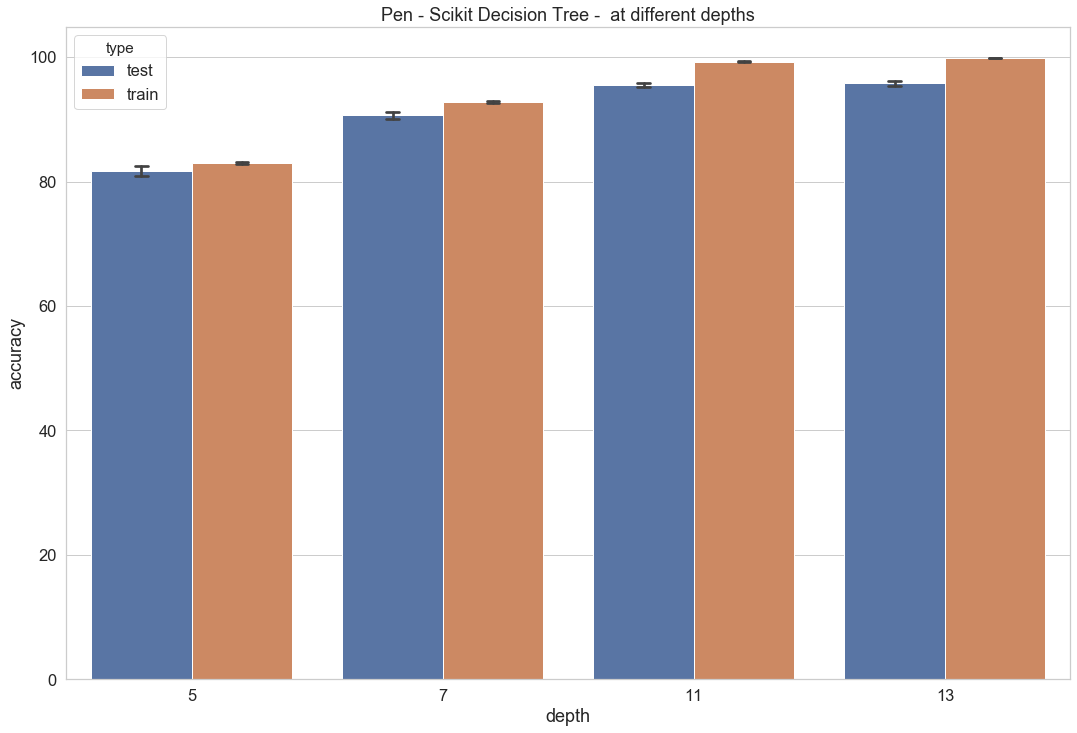

In [69]:
accuracyDTSciPen = []
accuracyDTSciPenTrain = []


depth_features = [5,7,11,13]
pen_scikit_decision_tree_dict = {}

for i in depth_features:
    accuracyDTSciPen = []
    accuracyDTSciPenTrain = []
    k_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
    model=DecisionTreeClassifier(max_depth=i)

    for train, test in k_fold.split(dataSet, label):
        model.fit(dataSet[train],label[train])
        y_pred=model.predict(dataSet[test])
        y_pred_train = model.predict(dataSet[train])
        accuracyDTSciPen.append(metrics.accuracy_score(label[test], y_pred)*100)
        accuracyDTSciPenTrain.append(metrics.accuracy_score(label[train], y_pred_train)*100)
    pen_scikit_decision_tree_dict[i] = {'test':accuracyDTSciPen, 'train':accuracyDTSciPenTrain}

# print(accuracyDTSciOptic)
# print(accuracyDTSciOpticTrain)

print(pen_scikit_decision_tree_dict)

df_pen_sk_dt = df_produce(pen_scikit_decision_tree_dict,'depth')
plt.figure(figsize=(18,12))
ax = sns.barplot(x="depth", y="accuracy", hue="type", data=df_pen_sk_dt, ci="sd",capsize=.05).set_title("Pen - Scikit Decision Tree -  at different depths")
ax = sns.set(style="whitegrid", font_scale=1.5)

## Pen Scikit Random Forest

{5: {'test': [89.71911644395965, 89.44065484311051, 89.69945355191257], 'train': [89.95221843003412, 90.43264637641599, 91.1620294599018]}, 23: {'test': [90.67357512953367, 91.13233287858117, 89.80874316939891], 'train': [91.01706484641639, 91.92029480005459, 91.29841789416258]}, 59: {'test': [89.25552222525225, 90.28649386084584, 89.6448087431694], 'train': [90.07508532423209, 91.04681315681725, 91.2847790507365]}, 101: {'test': [89.52822470684482, 89.7680763983629, 89.2896174863388], 'train': [89.24232081911263, 90.86938719803467, 90.13911620294598]}}


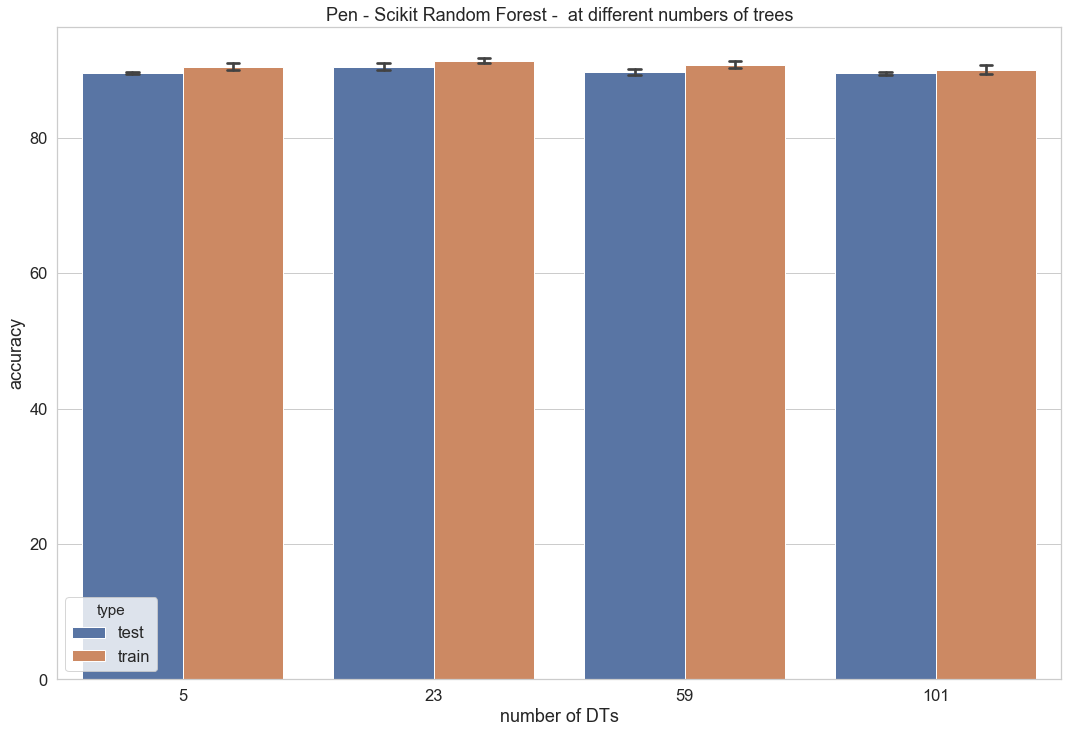

In [70]:
pen_scikit_random_forest_dict = {}
depth_features = [5,23,59,101]


for i in depth_features:
    accuracyRFSciPen = []
    accuracyRFSciPenTrain = []
    k_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
    model=RandomForestClassifier(max_depth=5)

    for train, test in k_fold.split(dataSet, label):
        model.fit(dataSet[train],label[train])
        y_pred=model.predict(dataSet[test])
        y_pred_train = model.predict(dataSet[train])
        accuracyRFSciPen.append(metrics.accuracy_score(label[test], y_pred)*100)
        accuracyRFSciPenTrain.append(metrics.accuracy_score(label[train], y_pred_train)*100)
    pen_scikit_random_forest_dict[i] = {'test':accuracyRFSciPen, 'train':accuracyRFSciPenTrain}

# print(accuracyRFSciOptic)
# print(accuracyRFSciOpticTrain)

print(pen_scikit_random_forest_dict)

df_pen_sk_rf = df_produce(pen_scikit_random_forest_dict,'number of DTs')
plt.figure(figsize=(18,12))
ax = sns.barplot(x="number of DTs", y="accuracy", hue="type", data=df_pen_sk_rf, ci="sd",capsize=.05).set_title("Pen - Scikit Random Forest -  at different numbers of trees")
ax = sns.set(style="whitegrid", font_scale=1.5)